In [40]:
using Flux
using DiffEqFlux
using OrdinaryDiffEq
using GalacticOptim
using Plots

include("src/equations/initial_functions.jl")
include("src/equations/equations.jl")
include("src/utils/graphic_tools.jl")
include("src/utils/generators.jl")
include("src/utils/processing_tools.jl")
include("src/neural_ode/objectives.jl")

Main.Objectives

## Analytical solution

Compute the analytical solution u(t, x) and the analytical derivative by time of the solution u(t,x)

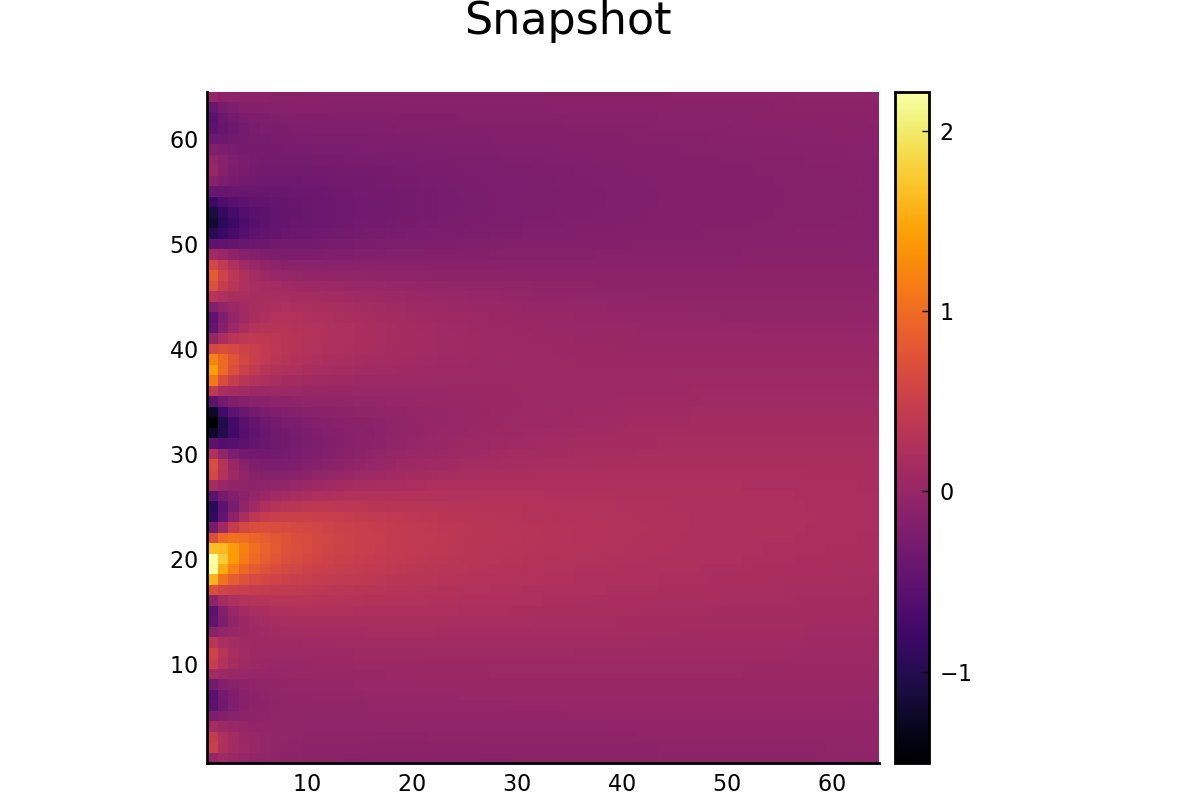

In [17]:
t_max = 0.5;
t_min = 0.;
x_max = 1.;
x_min = 0.;
t_n = 64;
x_n = 64;

nu = 0.03;

dt = round((t_max - t_min) / (t_n - 1), digits=8);
dx = round((x_max - x_min) / (x_n - 1), digits=8);

t = LinRange(t_min, t_max, t_n);
x = LinRange(x_min, x_max, x_n);

u0 = InitialFunctions.high_dim_random_init(t, x);
t, u = Equations.get_burgers_fft(t, dx, x_n, nu, u0[1, :]);
GraphicTools.show_state(u, "Snapshot") # need to reverse u, odesolver switch dimensions

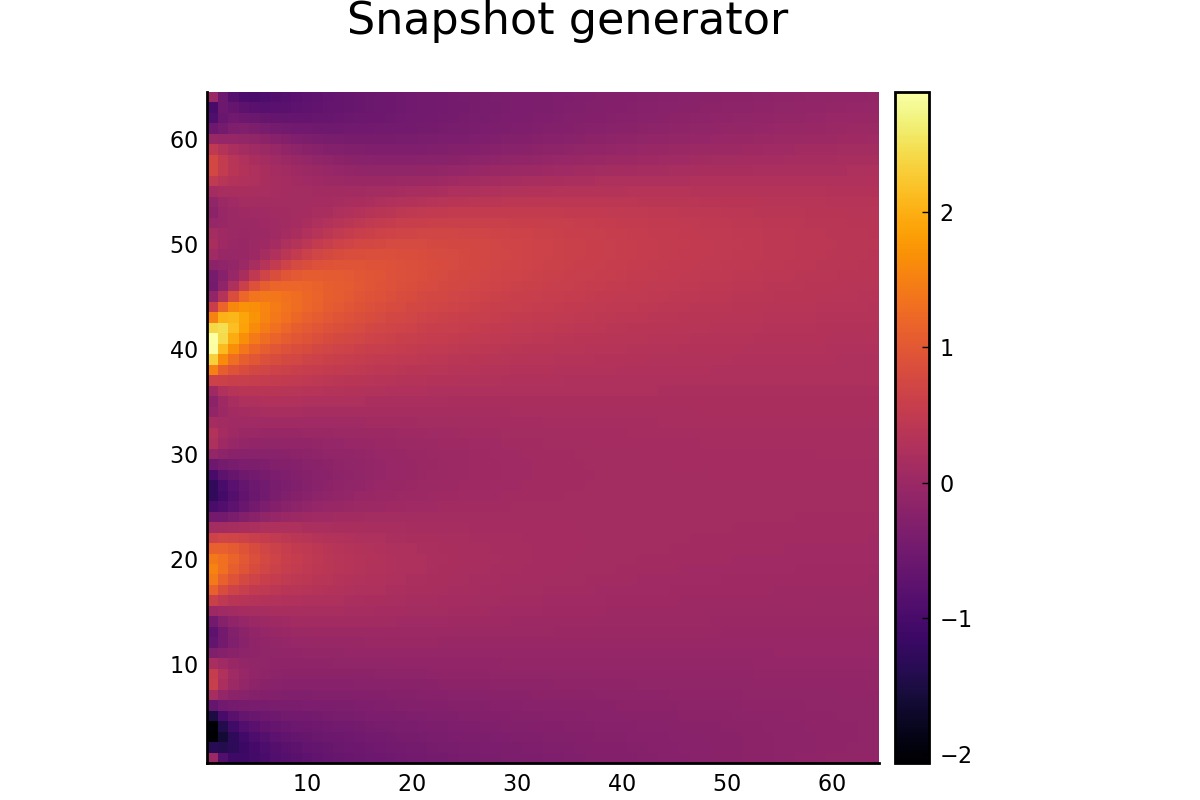

In [20]:
ta, u_a = Generator.burgers_snapshot_generator(t_max, t_min, x_max, x_min, t_n, x_n, nu, 2);
GraphicTools.show_state(u_a, "Snapshot generator")

In [46]:
dataset = Generator.generate_burgers_training_dataset(t_max, t_min, x_max, x_min, t_n, x_n, nu, 4, 2, 4, false, "burgers_training_set.jld2", "training_set")
# dataset = Generator.read_dataset("burgers_training_set.jld2")["training_set"];
# t, u0, u = ProcessingTools.process_dataset(dataset, false);

Item1Item2Item3Item4

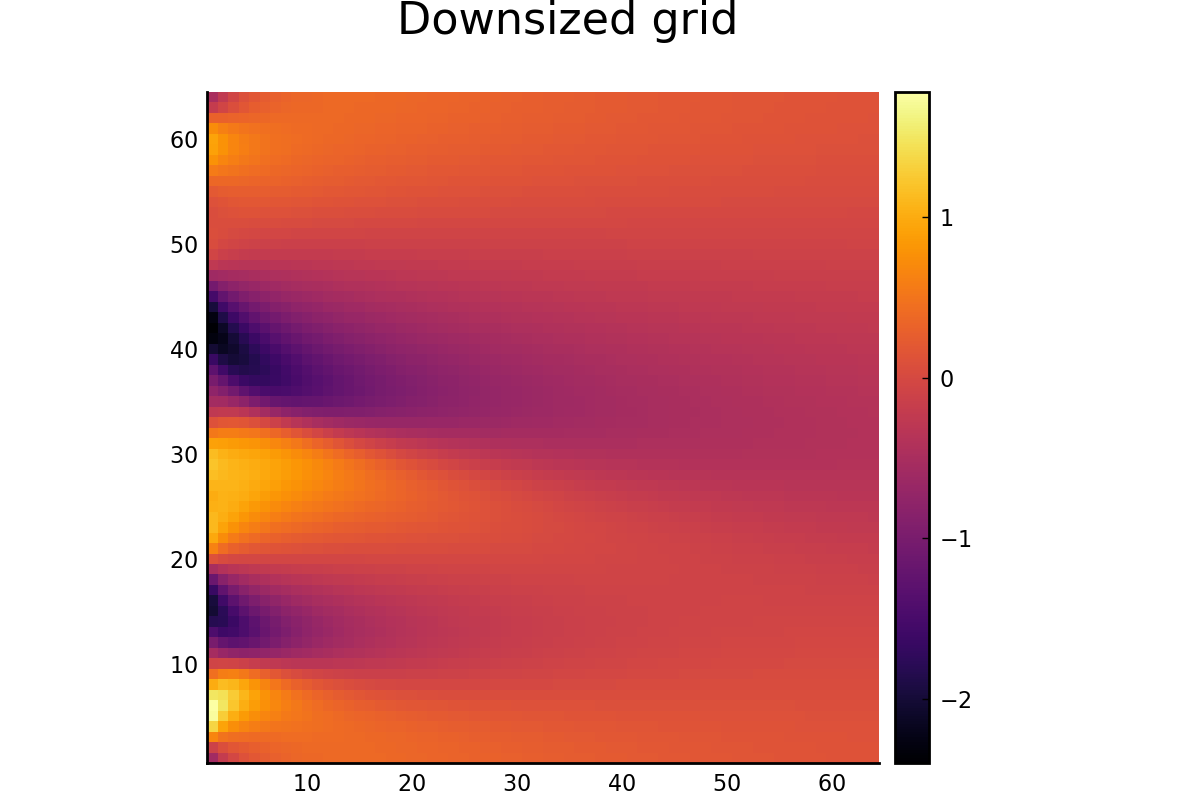

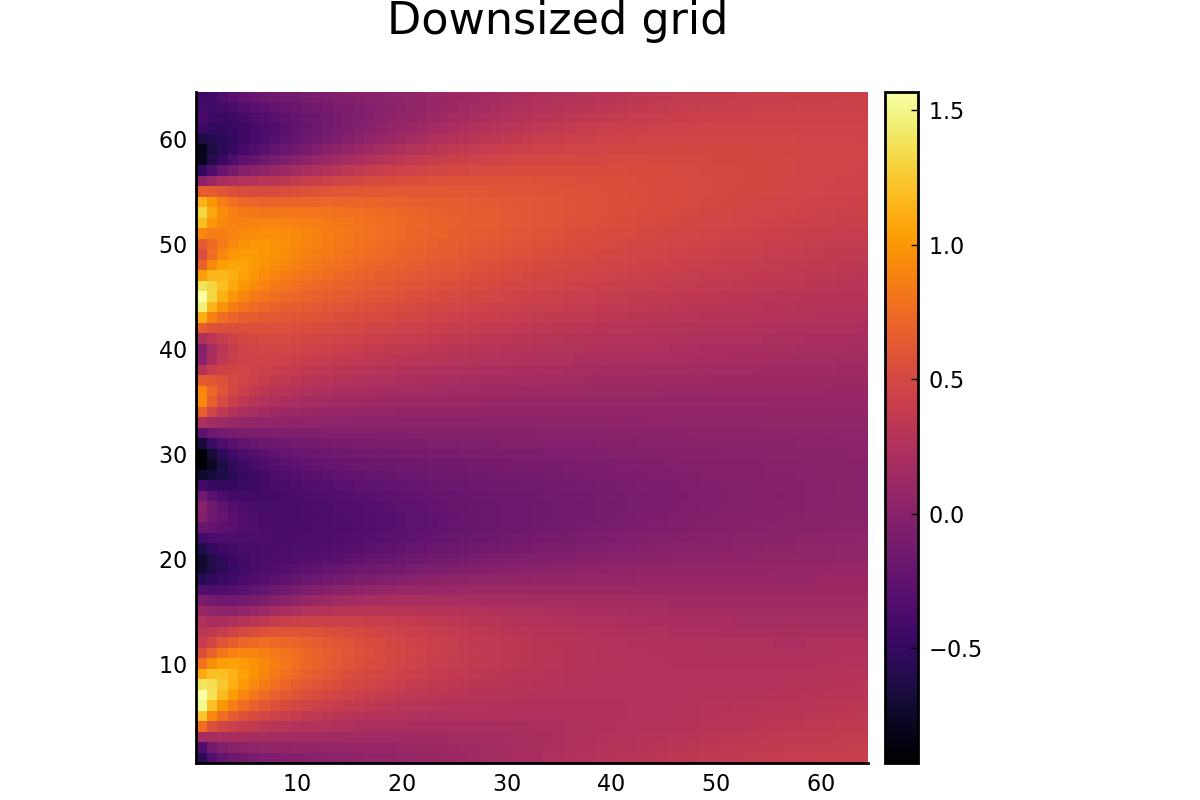

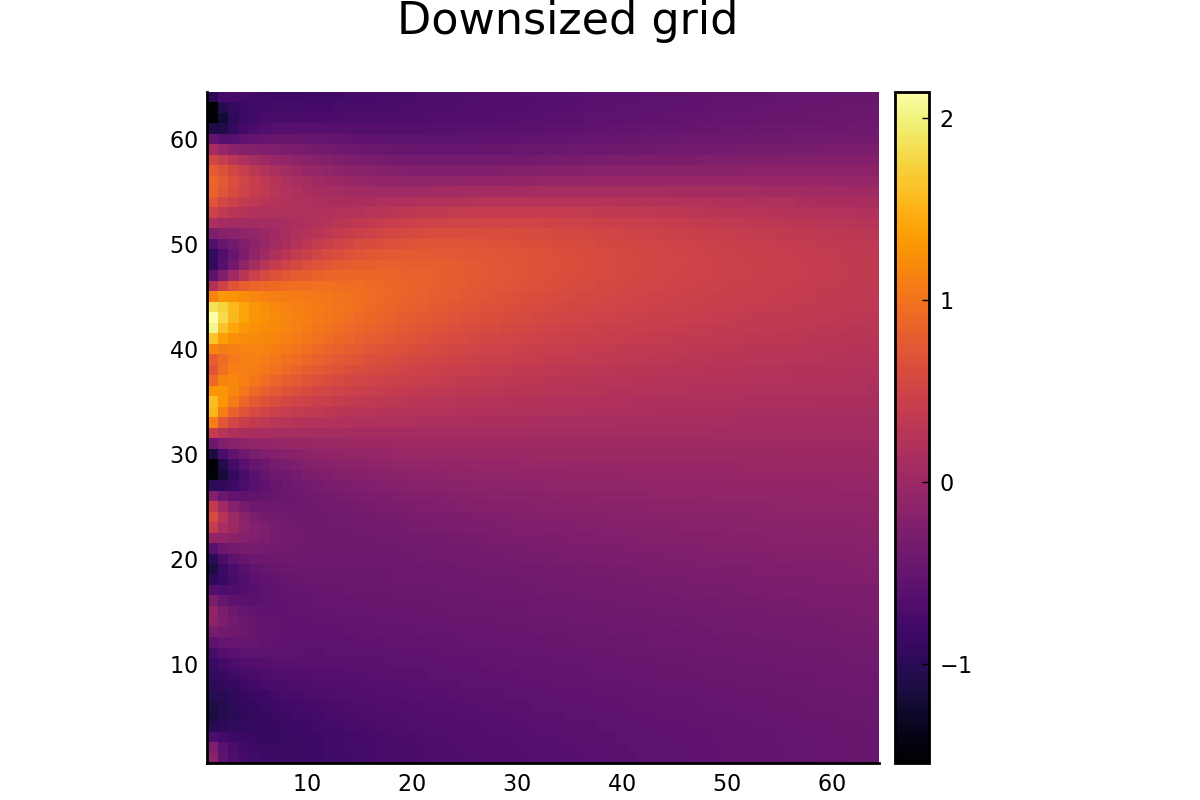

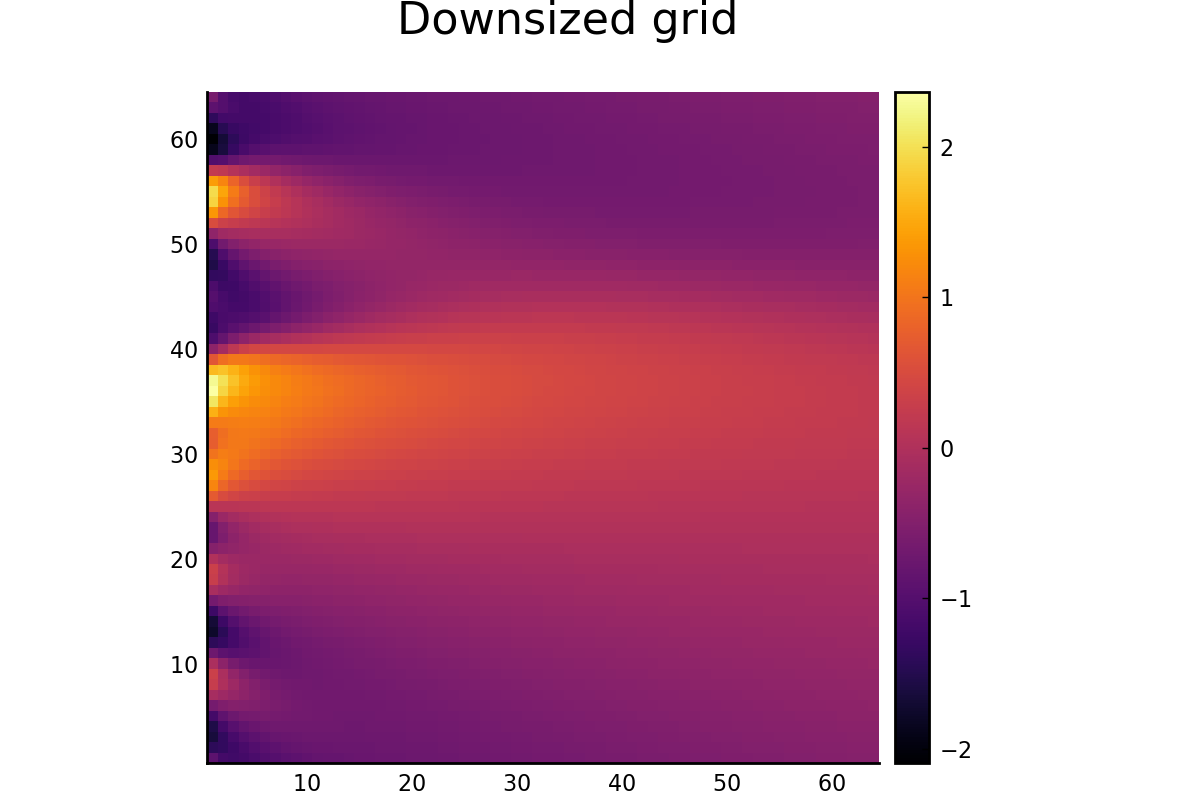

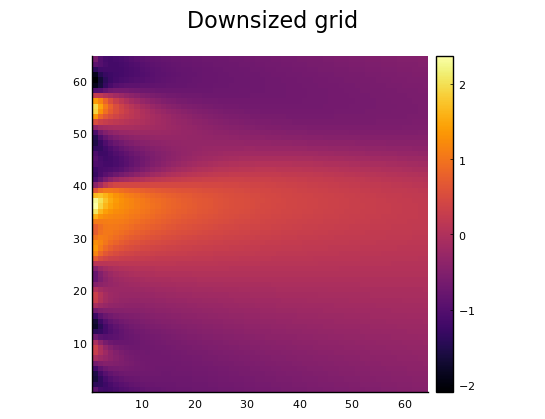

In [45]:
function check_training_dataset(dataset)
    for i in range(1, 4, step=1)
        a, b = dataset[i];
        #print("Low t  = ", collect(a), '\n')
        display(GraphicTools.show_state(b, "Downsized grid"))
    end
end

check_training_dataset(dataset)